## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE


## Data Extraction

In [2]:
arff_file = arff.loadarff('dataset_31_credit-g.arff')

In [3]:
df = pd.DataFrame(arff_file[0])

In [4]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
5,b'no checking',36.0,b'existing paid',b'education',9055.0,b'no known savings',b'1<=X<4',2.0,b'male single',b'none',...,b'no known property',35.0,b'none',b'for free',1.0,b'unskilled resident',2.0,b'yes',b'yes',b'good'
6,b'no checking',24.0,b'existing paid',b'furniture/equipment',2835.0,b'500<=X<1000',b'>=7',3.0,b'male single',b'none',...,b'life insurance',53.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
7,b'0<=X<200',36.0,b'existing paid',b'used car',6948.0,b'<100',b'1<=X<4',2.0,b'male single',b'none',...,b'car',35.0,b'none',b'rent',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
8,b'no checking',12.0,b'existing paid',b'radio/tv',3059.0,b'>=1000',b'4<=X<7',2.0,b'male div/sep',b'none',...,b'real estate',61.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
9,b'0<=X<200',30.0,b'critical/other existing credit',b'new car',5234.0,b'<100',b'unemployed',4.0,b'male mar/wid',b'none',...,b'car',28.0,b'none',b'own',2.0,b'high qualif/self emp/mgmt',1.0,b'none',b'yes',b'bad'


## EDA

### Checking information of the datasets

In [5]:
print(df.shape)

(1000, 21)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Checking missing data

In [7]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

- Observasi : 
1. Semua feature tidak memiliki missing value

### Target - Class

In [8]:
val_count = df["class"].value_counts()
val_count

class
b'good'    700
b'bad'     300
Name: count, dtype: int64

- Observasi 
1. Persebaran kelas pada target tidak seimbang dimana kelas bad lebih jarang terjadi dibandingkan dengan kelas good

### Categorical columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [10]:
object_cols = [i for i in df.columns if df[i].dtype == object]

In [11]:
for col in object_cols:
    print(f"{col}\n{df[col].value_counts().to_string()}\n")

checking_status
checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63

credit_history
credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40

purpose
purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9

savings_status
savings_status
b'<100'                603
b'no known savings'    183
b'100<=X<500'          103
b'500<=X<1000'          63
b'>=1000'               48

employment
employment
b'1<=X<4'        339
b'>=7'           253
b'4<=X<7'        174
b'<1'            172
b'unemployed'     62

personal_status
personal_status


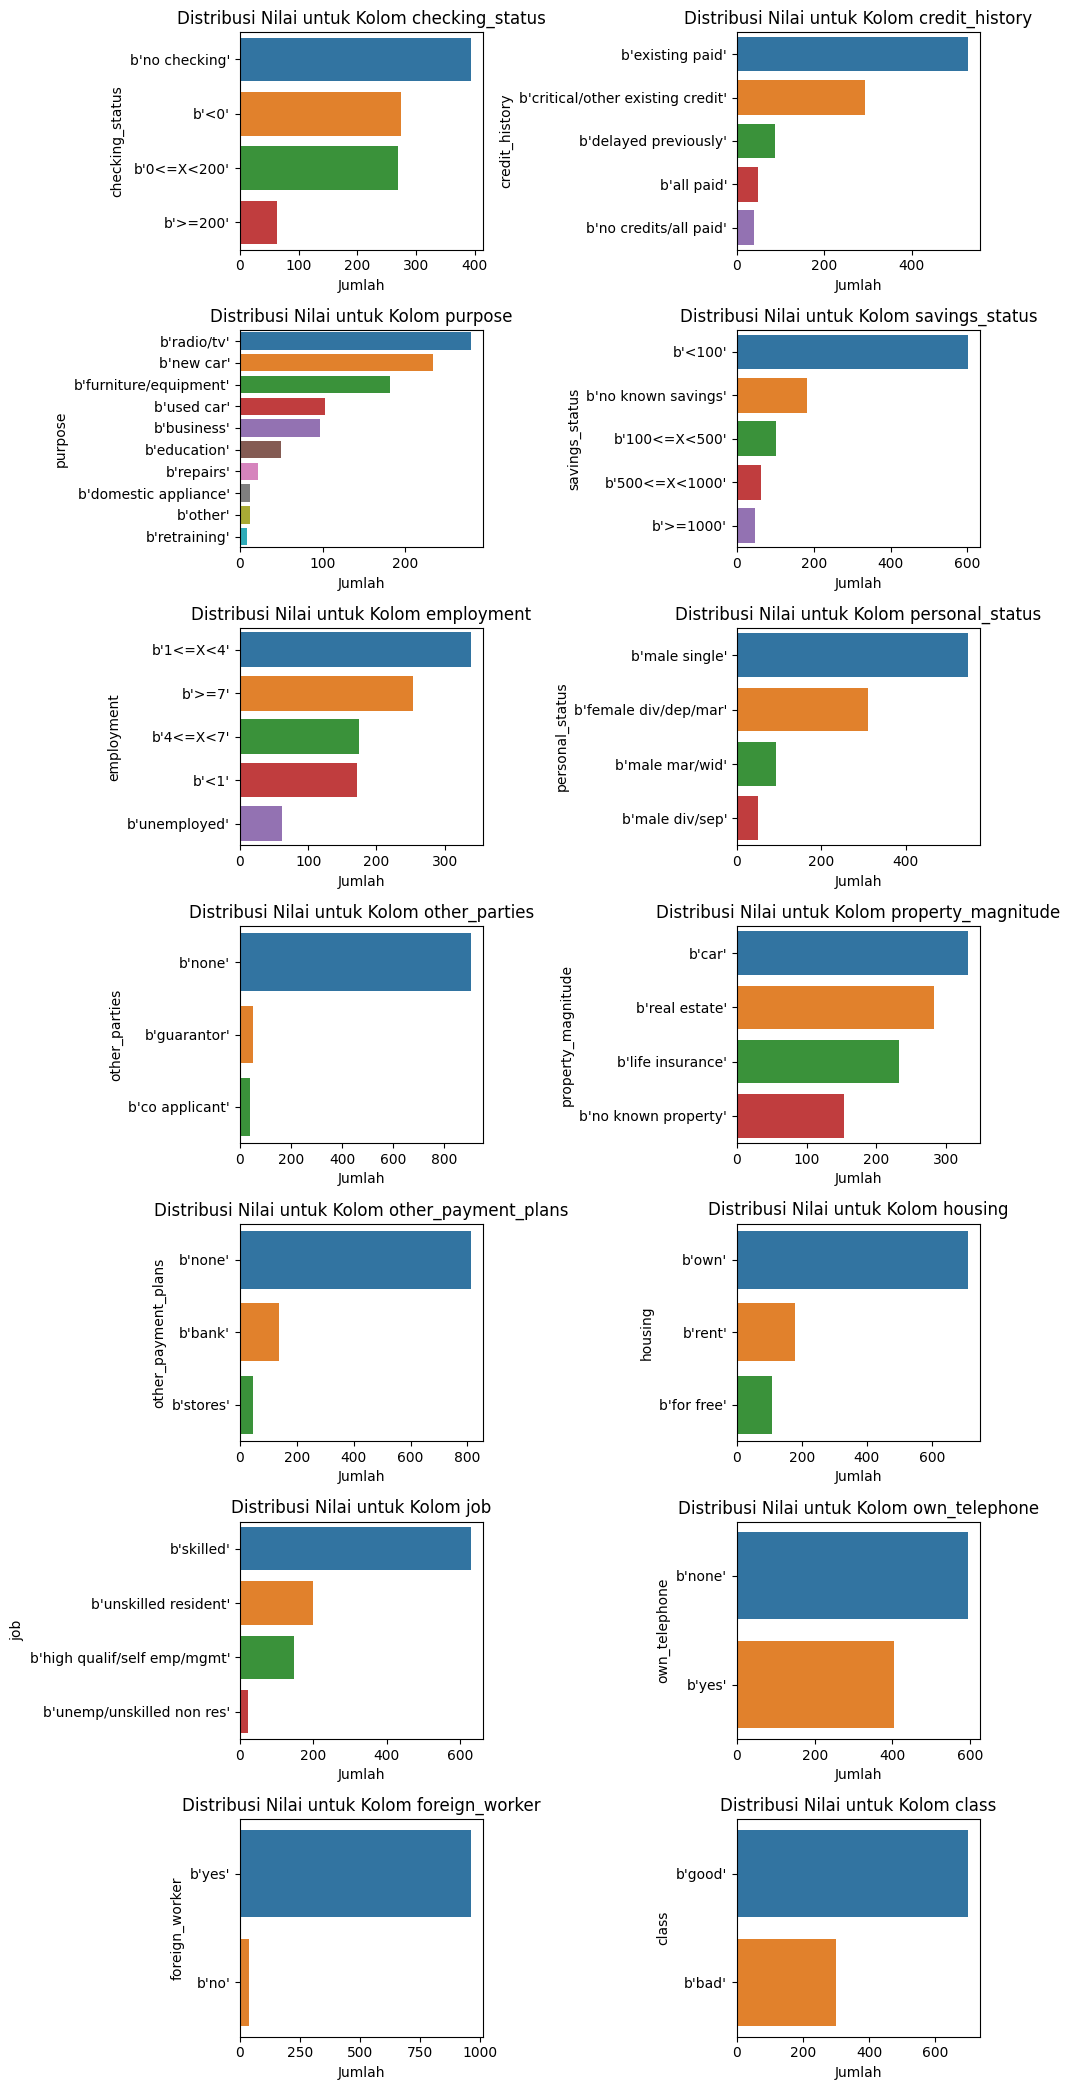

In [12]:
# Plot value counts pada data kategorikal
# Menghitung jumlah baris yang diperlukan (setiap baris berisi 2 subplot)
n_rows = (len(object_cols) + 1) // 2

# Set ukuran figure untuk plot
plt.figure(figsize=(10, 3 * n_rows))

# Melakukan iterasi untuk setiap kolom yang memiliki tipe data object
for i, col in enumerate(object_cols):
    plt.subplot(n_rows, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribusi Nilai untuk Kolom {col}")
    plt.xlabel("Jumlah")
    plt.ylabel(col)

# Menyesuaikan layout setelah semua plot dibuat
plt.tight_layout()

# Menampilkan plot
plt.show()


### 1. Analisis Distribusi Fitur

### Checking Status
- **Distribusi:**
  - `no checking`: 394
  - `<0`: 274
  - `0<=X<200`: 269
  - `>=200`: 63
- **Analisis:** Sebagian besar orang tidak memiliki rekening giro atau memiliki saldo yang rendah. Ini menunjukkan tingkat stabilitas finansial yang mungkin rendah.

### Credit History
- **Distribusi:**
  - `existing paid`: 530
  - `critical/other existing credit`: 293
  - `delayed previously`: 88
  - `all paid`: 49
  - `no credits/all paid`: 40
- **Analisis:** Mayoritas memiliki riwayat kredit yang baik, tetapi ada cukup banyak yang bermasalah dengan kredit.

### Purpose
- **Distribusi:**
  - `radio/tv`: 280
  - `new car`: 234
  - `furniture/equipment`: 181
  - `used car`: 103
  - `business`: 97
  - `education`: 50
  - `repairs`: 22
  - `domestic appliance`: 12
  - `other`: 12
  - `retraining`: 9
- **Analisis:** Mayoritas kredit diambil untuk keperluan konsumsi seperti membeli barang elektronik atau kendaraan.

### Savings Status
- **Distribusi:**
  - `<100`: 603
  - `no known savings`: 183
  - `100<=X<500`: 103
  - `500<=X<1000`: 63
  - `>=1000`: 48
- **Analisis:** Kebanyakan orang memiliki tabungan yang sangat rendah, mengindikasikan kondisi keuangan yang rapuh.

### Employment
- **Distribusi:**
  - `1<=X<4`: 339
  - `>=7`: 253
  - `4<=X<7`: 174
  - `<1`: 172
  - `unemployed`: 62
- **Analisis:** Kebanyakan orang memiliki pekerjaan stabil, tetapi ada juga yang baru mulai bekerja atau tidak bekerja.

### Personal Status
- **Distribusi:**
  - `male single`: 548
  - `female div/dep/mar`: 310
  - `male mar/wid`: 92
  - `male div/sep`: 50
- **Analisis:** Kebanyakan pengambil kredit adalah pria lajang.

### Other Parties
- **Distribusi:**
  - `none`: 907
  - `guarantor`: 52
  - `co applicant`: 41
- **Analisis:** Sebagian besar orang tidak melibatkan pihak lain dalam pengajuan kredit.

### Property Magnitude
- **Distribusi:**
  - `car`: 332
  - `real estate`: 282
  - `life insurance`: 232
  - `no known property`: 154
- **Analisis:** Mayoritas orang memiliki aset berupa mobil atau properti lainnya.

### Other Payment Plans
- **Distribusi:**
  - `none`: 814
  - `bank`: 139
  - `stores`: 47
- **Analisis:** Kebanyakan orang tidak memiliki rencana pembayaran tambahan.

### Housing
- **Distribusi:**
  - `own`: 713
  - `rent`: 179
  - `for free`: 108
- **Analisis:** Mayoritas memiliki rumah sendiri.

### Job
- **Distribusi:**
  - `skilled`: 630
  - `unskilled resident`: 200
  - `high qualif/self emp/mgmt`: 148
  - `unemp/unskilled non res`: 22
- **Analisis:** Sebagian besar bekerja di bidang yang membutuhkan keterampilan.

### Own Telephone
- **Distribusi:**
  - `none`: 596
  - `yes`: 404
- **Analisis:** Hampir setengah dari populasi tidak memiliki telepon.

### Foreign Worker
- **Distribusi:**
  - `yes`: 963
  - `no`: 37
- **Analisis:** Mayoritas populasi terdiri dari pekerja asing.

### Class
- **Distribusi:**
  - `good`: 700
  - `bad`: 300
- **Analisis:** Sebagian besar memiliki status kredit yang baik, tetapi ada juga yang bermasalah.

### 2. Langkah Solusi Dalam Data Preprocessing

### Keseimbangan Kelas
- **Masalah:** Kelas "good" (700) lebih banyak dari kelas "bad" (300).
- **Solusi:**
  - Oversampling kelas minoritas (misalnya menggunakan SMOTE).
  - Undersampling kelas mayoritas.
  - Menggunakan metode ensemble yang khusus menangani ketidakseimbangan.

### Penanganan Data Kategoris
- **Solusi:**
  - Label Encoding untuk fitur dengan urutan tertentu (misalnya `checking_status`).
  - One-Hot Encoding untuk fitur tanpa urutan (misalnya `purpose`).

### Handling Imbalanced Data in Different Features
- **Solusi:** Periksa keseimbangan fitur lain, seperti `foreign_worker`, dan lakukan penyesuaian jika diperlukan.




### Float columns

In [13]:
float_cols = [i for i in df.columns if df[i].dtype == float]
float_cols

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

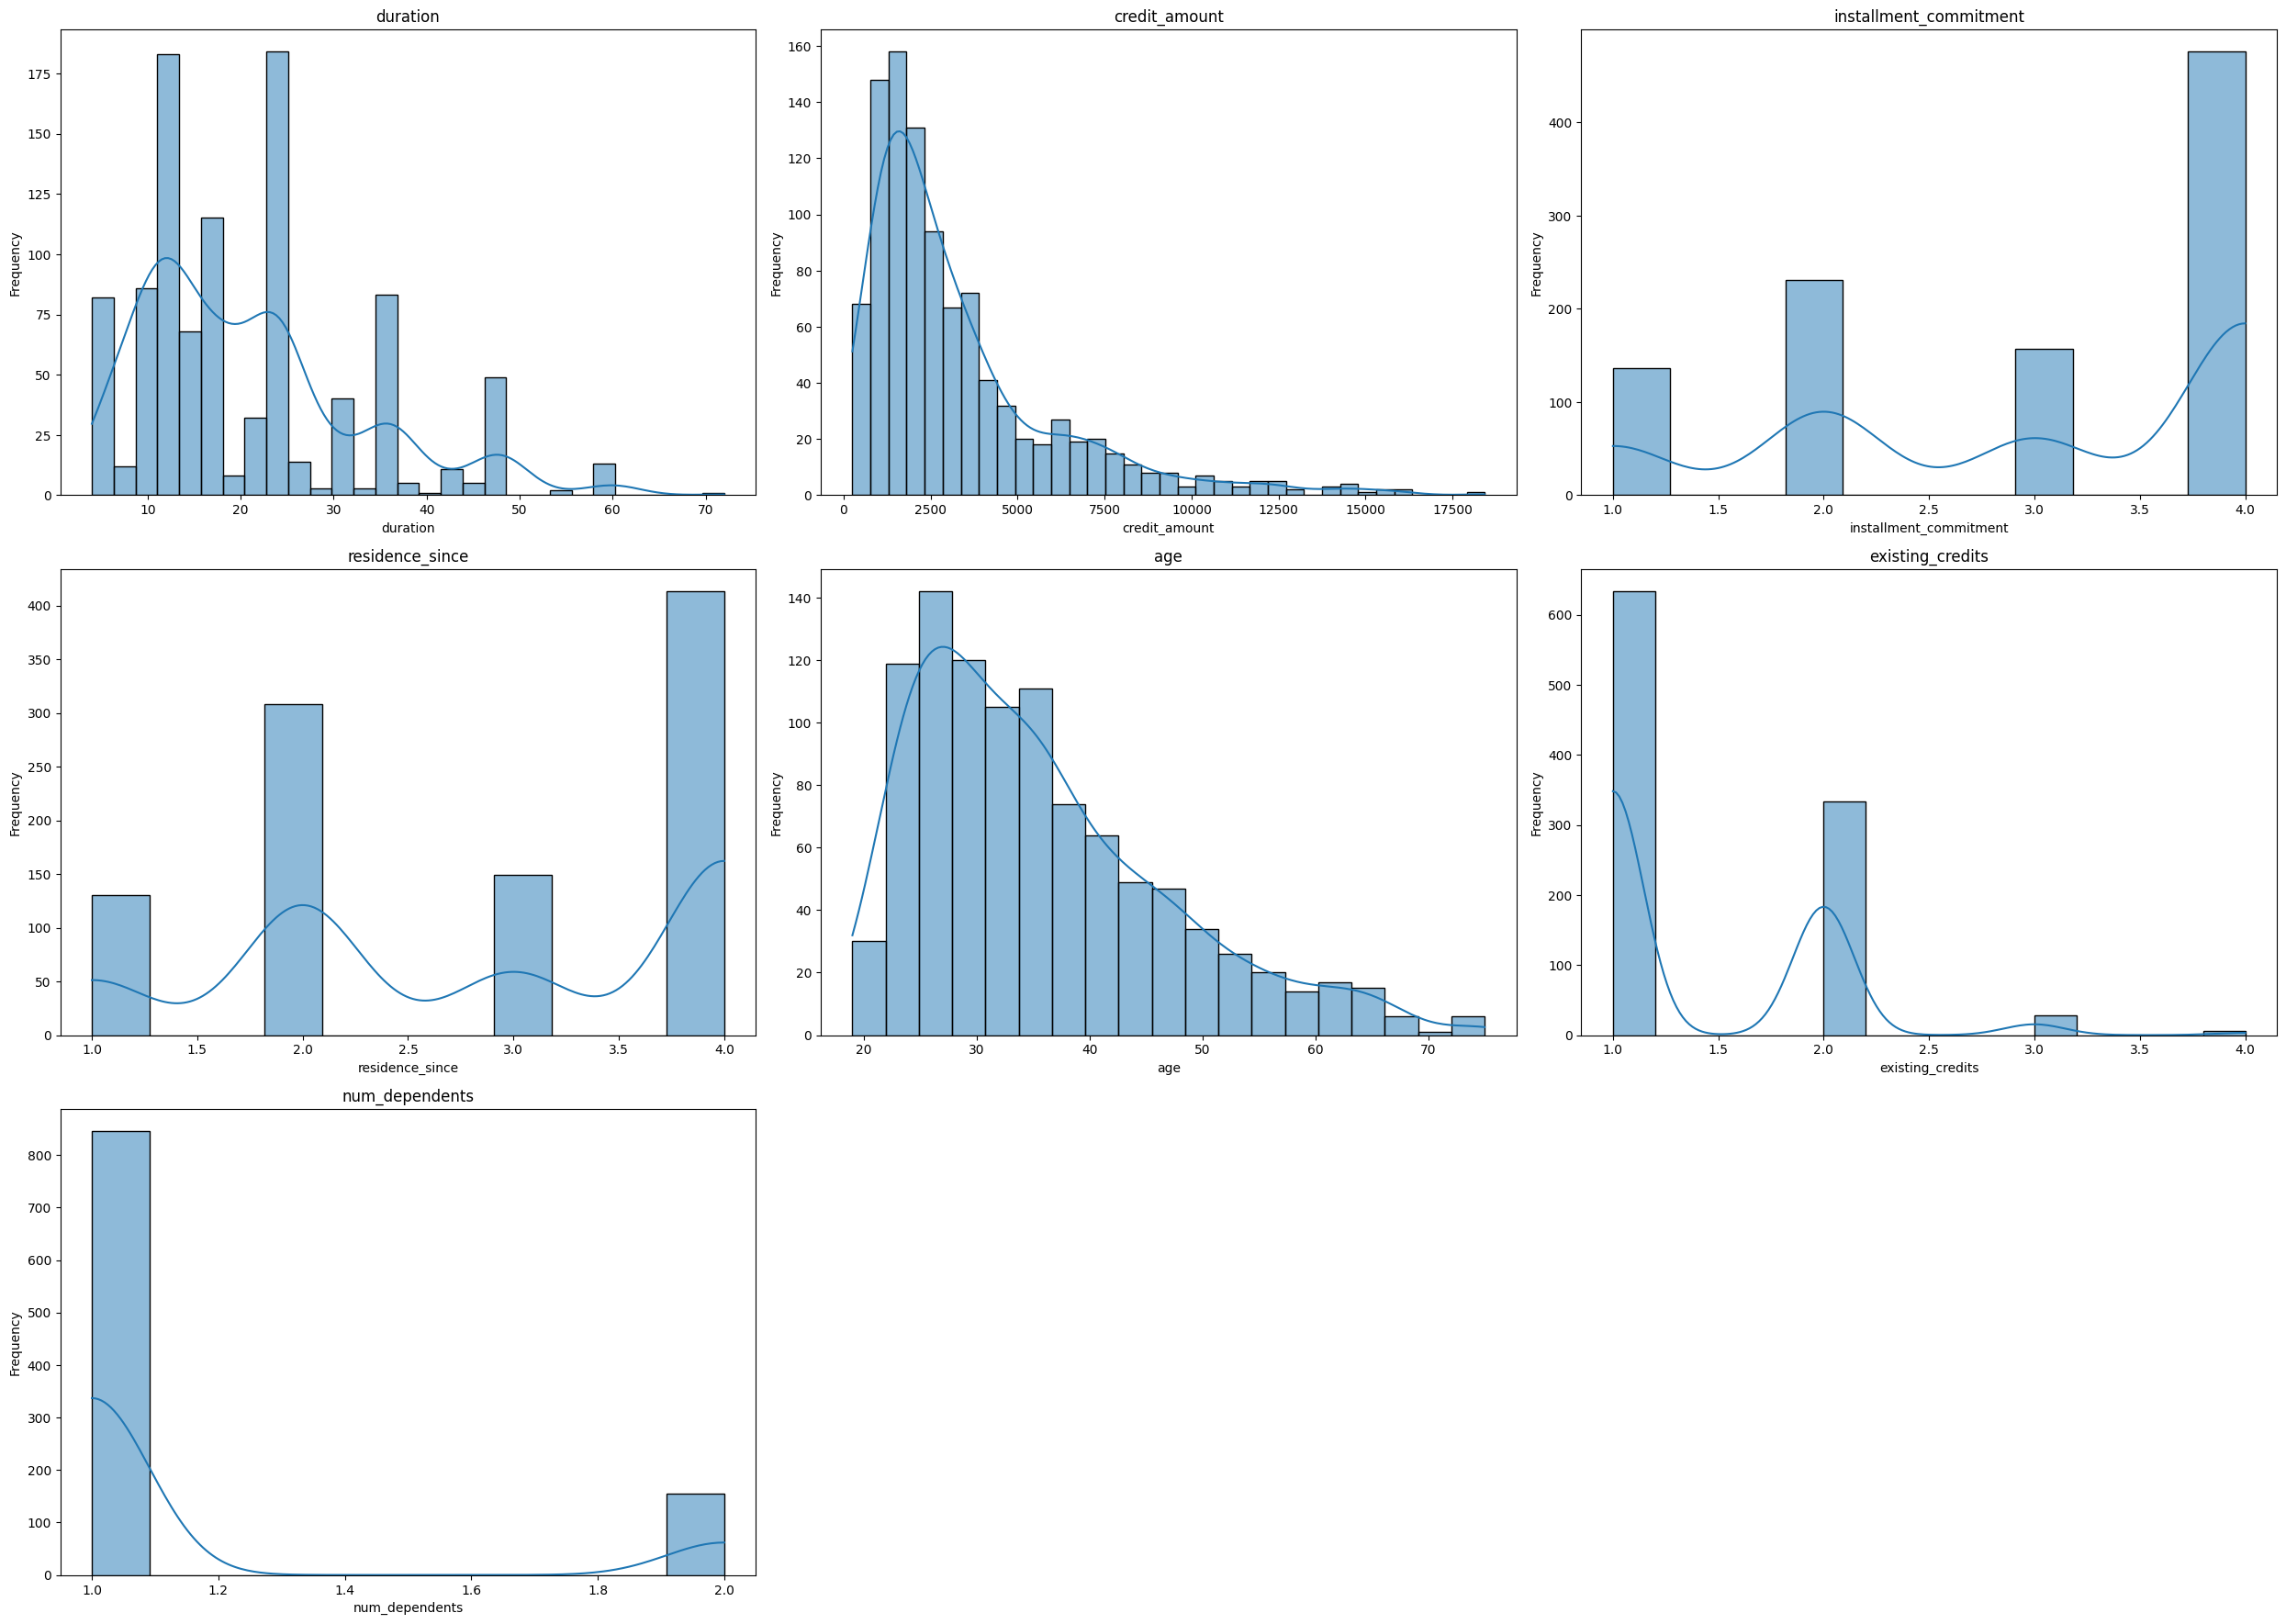

In [14]:
# Menampilkan plot persebaran data float
# Set ukuran figure untuk plot
plt.figure(figsize=(25, 35))

# Melakukan iterasi untuk setiap kolom di float_cols
for i, column in enumerate(float_cols):
    plt.subplot(6, 3, i + 1)  # Menyusun plot dalam grid 6x3
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Menyesuaikan layout setelah semua plot dibuat
plt.tight_layout()

# Menampilkan plot
plt.show()


### Analisis Visual Fitur Numerik dan Langkah Preprocessing

### 1. Duration
- **Distribusi:** Duration terlihat memiliki distribusi multimodal, dengan beberapa puncak di sekitar 10, 15, dan 30 bulan. Ada juga rentang yang lebih panjang hingga 70 bulan.
- **Analisis:** Rentang yang panjang ini mungkin menandakan adanya outliers atau variasi besar dalam durasi kredit.
- **Solusi:**
  - Dengan meneraplan binning atau scaling  untuk mengurangi dampak outliers pada analisis.

### 2. Credit Amount
- **Distribusi:** Distribusi credit amount menunjukkan skewness ke kanan (right-skewed), dengan mayoritas nilai berada di kisaran yang lebih rendah (di bawah 5.000) dan beberapa nilai yang sangat tinggi.
- **Analisis:** Distribusi skewed ini menunjukkan bahwa terdapat outliers atau kredit dengan jumlah yang sangat tinggi.
- **Solusi:**
  - Melakukan log transformation untuk mengatasi skewness atau pertimbangkan untuk menangani outliers secara manual.

### 3. Installment Commitment
- **Distribusi:** Nilai installment commitment tampak terdistribusi dalam beberapa kategori dengan puncak di nilai tertinggi (sekitar 4).
- **Analisis:** Fitur ini mungkin merepresentasikan kategori dengan jumlah cicilan tetap. Tidak ada indikasi masalah besar dalam distribusi ini.
- **Solusi:**
  - Melakukan Scaling mungkin dapat diterapkan jika akan digunakan dalam model yang sensitif terhadap skala fitur.

### 4. Residence Since
- **Distribusi:** Terdapat beberapa puncak dalam distribusi residence since, yang menunjukkan orang-orang cenderung berada di tempat tinggal mereka selama periode waktu tertentu.
- **Analisis:** Distribusi ini menunjukkan adanya pengelompokan dalam data, mungkin berdasarkan pola umum berpindah tempat tinggal.
- **Solusi:**
  - Melakukan Binning atau scaling dapat diterapkan jika diperlukan, tergantung pada model yang digunakan.

### 5. Age
- **Distribusi:** Distribusi usia terlihat skewed ke kanan dengan puncak di usia 20-30 tahun dan menurun seiring bertambahnya usia.
- **Analisis:** Distribusi usia yang tidak merata ini cukup wajar dan tidak menunjukkan masalah besar.
- **Solusi:**
  - Mempertimbangkan normalisasi atau standar scaling jika model yang digunakan sensitif terhadap distribusi fitur.

### 6. Existing Credits
- **Distribusi:** Mayoritas orang memiliki 1 existing credit, dengan beberapa orang memiliki lebih dari satu hingga empat kredit.
- **Analisis:** Distribusi ini menunjukkan bahwa kebanyakan individu memiliki sedikit kredit aktif, dengan beberapa memiliki lebih banyak. Outliers mungkin perlu diperhatikan.
- **Solusi:**
  - Scaling atau binning dapat membantu jika fitur ini memberikan pengaruh besar dalam model.

### 7. Num Dependents
- **Distribusi:** Hampir semua individu memiliki 1 dependent, dengan sebagian kecil memiliki 2 dependents.
- **Analisis:** Distribusi ini sangat skewed dengan mayoritas besar pada satu nilai, yang bisa menyebabkan informasi fitur menjadi kurang signifikan dalam model.
- **Solusi:**
  - Fitur ini mungkin perlu diubah atau bahkan dihapus jika ternyata tidak berkontribusi banyak dalam prediksi model.

### Langkah Umum Data Preprocessing Berdasarkan Analisis:
1. **Log Transformation:**
   - Terapkan log transformation pada fitur `credit_amount` dan `duration` untuk mengurangi skewness dan dampak outliers.
2. **Outlier Handling:**
   - Identifikasi dan pertimbangkan capping atau penghapusan outliers dalam fitur `credit_amount`, `duration`, dan `existing_credits`.
3. **Binning:**
   - Pertimbangkan binning untuk fitur `duration`, `residence_since`, dan `age` untuk mengurangi variabilitas yang berlebihan dan membuat fitur lebih manageable.
4. **Scaling:**
   - Pastikan untuk melakukan scaling (misalnya StandardScaler atau MinMaxScaler) untuk fitur-fitur numerik seperti `installment_commitment`, `age`, dan `residence_since` jika model yang digunakan sensitif terhadap skala data.
5. **Feature Selection:**
   - Pertimbangkan apakah fitur seperti `num_dependents` perlu dimasukkan dalam model. Jika distribusinya terlalu skewed dan tidak berkontribusi, fitur ini dapat dihapus.



## Data preprocessing

In [15]:
# Implementing One Hot Encoding for features
features = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

credit= pd.get_dummies(df,columns = features)

In [16]:
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   duration                                          1000 non-null   float64
 1   credit_amount                                     1000 non-null   float64
 2   installment_commitment                            1000 non-null   float64
 3   residence_since                                   1000 non-null   float64
 4   age                                               1000 non-null   float64
 5   existing_credits                                  1000 non-null   float64
 6   num_dependents                                    1000 non-null   float64
 7   class                                             1000 non-null   object 
 8   checking_status_b'0<=X<200'                       1000 non-null   bool   
 9   checking_status_b'<0

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_b'0<=X<200',checking_status_b'<0',...,housing_b'own',housing_b'rent',job_b'high qualif/self emp/mgmt',job_b'skilled',job_b'unemp/unskilled non res',job_b'unskilled resident',own_telephone_b'none',own_telephone_b'yes',foreign_worker_b'no',foreign_worker_b'yes'
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,b'good',False,True,...,True,False,False,True,False,False,False,True,False,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,b'bad',True,False,...,True,False,False,True,False,False,True,False,False,True
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,b'good',False,False,...,True,False,False,False,False,True,True,False,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,b'good',False,True,...,False,False,False,True,False,False,True,False,False,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,b'bad',False,True,...,False,False,False,True,False,False,True,False,False,True


In [17]:
# 1. Log Transformation
credit['credit_amount_log'] = np.log1p(credit['credit_amount'])  # log1p digunakan untuk log(1 + x) agar bisa menangani nilai 0
credit['duration_log'] = np.log1p(credit['duration'])

In [18]:
# 2. Outlier Handling
# Mengidentifikasi outliers menggunakan metode IQR (Interquartile Range)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Menggunakan capping untuk mengganti outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

# Menerapkan outlier handling pada kolom yang relevan
credit = handle_outliers(credit, 'credit_amount_log')
credit = handle_outliers(credit, 'duration_log')
credit = handle_outliers(credit, 'existing_credits')

In [19]:
# 3. Feature Selection
# Mempertimbangkan untuk menghapus fitur 'num_dependents' jika distribusinya skewed atau tidak berkontribusi
if credit['num_dependents'].value_counts(normalize=True).max() > 0.95:
    credit = credit.drop(columns=['num_dependents'])

In [20]:
# 4. Dividing target from dataset
X = credit.drop(['class'], axis=1)

In [21]:
# 5. Encoding target field
encode = LabelEncoder()
Y = credit['class'].values
Y = encode.fit_transform(Y)
encode.classes_

# 6. SMOTE untuk menangani ketidakseimbangan kelas setelah target encoding
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# 7. Splitting data setelah SMOTE
X_train, X_valid, Y_train, Y_valid = train_test_split(X_resampled, Y_resampled, test_size=0.15, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.176, random_state=0)

# 8. Verifikasi ukuran set pelatihan, validasi, dan pengujian
print(X_train.shape, X_valid.shape, X_test.shape)

(980, 63) (210, 63) (210, 63)


In [22]:
# 9. Normalize the feature
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Implementing Decision Tree

In [23]:
for i in range(1,20):
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    decision_tree.fit(X_train, Y_train)

    Y_train_predict = decision_tree.predict(X_train)
    Y_valid_predict = decision_tree.predict(X_valid)

    class_proba = decision_tree.predict_proba(X_valid)

    accuracy_valid = decision_tree.score(X_test, Y_test)
    accuracy_train = decision_tree.score(X_train, Y_train)

    print('Accuracy on train set = %f, accuracy on validation set  = %f with max_depth = %d' %(accuracy_train,accuracy_valid,i))

Accuracy on train set = 0.707143, accuracy on validation set  = 0.723810 with max_depth = 1
Accuracy on train set = 0.724490, accuracy on validation set  = 0.728571 with max_depth = 2
Accuracy on train set = 0.725510, accuracy on validation set  = 0.761905 with max_depth = 3
Accuracy on train set = 0.767347, accuracy on validation set  = 0.752381 with max_depth = 4
Accuracy on train set = 0.795918, accuracy on validation set  = 0.771429 with max_depth = 5
Accuracy on train set = 0.813265, accuracy on validation set  = 0.709524 with max_depth = 6
Accuracy on train set = 0.845918, accuracy on validation set  = 0.757143 with max_depth = 7
Accuracy on train set = 0.886735, accuracy on validation set  = 0.752381 with max_depth = 8
Accuracy on train set = 0.912245, accuracy on validation set  = 0.742857 with max_depth = 9
Accuracy on train set = 0.939796, accuracy on validation set  = 0.771429 with max_depth = 10
Accuracy on train set = 0.958163, accuracy on validation set  = 0.757143 with m

In [24]:
# Tuning hyperparameter
param = [{'criterion':['entropy', 'gini'], 'max_depth':[el for el in range(1,20)],'random_state':[42]}]
grid_search = GridSearchCV(decision_tree, param, scoring='accuracy', return_train_score=True, cv=3)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'random_state': 42}

In [25]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
decision_tree.fit(X_train, Y_train)
Y_test_predict = decision_tree.predict(X_test)
class_proba_test = decision_tree.predict_proba(X_test)
accuracy_test = decision_tree.score(X_test, Y_test)
print('Accuracy on test set = %f' %(accuracy_test))

Accuracy on test set = 0.761905


In [26]:
# Metrics Evaluation
conf_matrix = confusion_matrix(Y_test, Y_test_predict)
prec_score = precision_score(Y_test, Y_test_predict)
rec_score = recall_score(Y_test, Y_test_predict)
f1 = f1_score(Y_test, Y_test_predict)
print('Precision, recall ad F1 are: %f, %f and %f'%(prec_score,rec_score,f1))


Precision, recall ad F1 are: 0.706897, 0.836735 and 0.766355


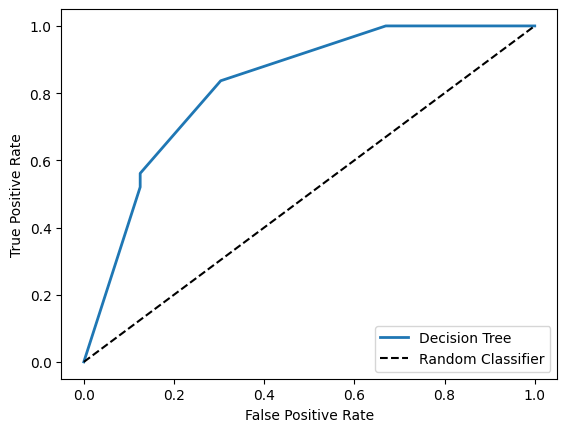

0.8238884839650146

In [27]:
# plotting roc curve
Y_scores_test_tree = class_proba_test[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test,Y_scores_test_tree)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--',label = 'Random Classifier') # dashed diagonal represents a pure random classifier 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(Y_test,Y_scores_test_tree)

## Implementing Logistic Regretion

In [28]:
accuracy_tr = {}
accuracy_v = {}
dic_train = {}
hyperparameters = [('l2','lbfgs'),('l2','newton-cg',),('l2','sag'),('l2','sag'),('l1','saga')]

for couple in hyperparameters:
    lr  = LogisticRegression( random_state=42,penalty = couple[0], solver = couple[1])
    lr.fit(X_train,Y_train)
    Y_predict_train = lr.predict(X_train)
    Y_predict_valid = lr.predict(X_valid)
    
    accuracy_tr[couple] = accuracy_score(Y_train,Y_predict_train)# I save in a dictionary the hyperparameters as (tuple) keya and with accuracy as value.
    accuracy_v[couple] = accuracy_score(Y_valid,Y_predict_valid)# See above.
    
for key in dic_train:
    print(key,accuracy_tr[key],accuracy_v[key])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
lr  = LogisticRegression( random_state=42,penalty = 'l1', solver = 'saga')
lr.fit(X_train,Y_train)
Y_predict_test = lr.predict(X_test)
class_proba = lr.predict_proba(X_test)
accuracy_t = accuracy_score(Y_test,Y_predict_test)

print('Accuracy on train set %f,accuracy on validation set %f and accuracy on test set %f'%(accuracy_tr[('l1','saga')],accuracy_v[('l1','saga')],accuracy_t))

Accuracy on train set 0.845918,accuracy on validation set 0.814286 and accuracy on test set 0.819048


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
cm = confusion_matrix(Y_test,Y_test_predict)
p = precision_score(Y_test,Y_predict_test)
r = recall_score(Y_test,Y_predict_test)
f1 = f1_score(Y_test,Y_predict_test)
print('Precision, recall ad F1 are: %f, %f and %f'%(p,r,f1))

Precision, recall ad F1 are: 0.772727, 0.867347 and 0.817308


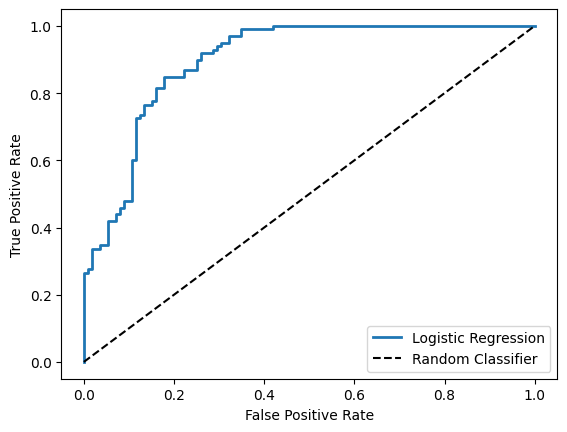

0.8989613702623906

In [31]:
Y_scores_test_logistic = class_proba[:,1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test,Y_scores_test_logistic)



plot_roc_curve(fpr_logistic, tpr_logistic, "Logistic Regression")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(Y_test,Y_scores_test_logistic)

## Implementing XGBoost

In [32]:
# Tuning hyperparameter
param = {
    'max_depth': [i for i in range(1, 20)],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200],
    'objective': ['binary:logistic'],
    'random_state': [42]
}
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
grid_search = GridSearchCV(xgb_model, param, scoring='accuracy', return_train_score=True, cv=3)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42}


In [33]:
# Training with best parameters
best_params = grid_search.best_params_
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, Y_train)
Y_test_predict = xgb_model.predict(X_test)
class_proba_test = xgb_model.predict_proba(X_test)[:, 1]

In [34]:
# Evaluate Metrics
accuracy_test = xgb_model.score(X_test, Y_test)
print('Accuracy on test set = %f' % accuracy_test)

conf_matrix = confusion_matrix(Y_test, Y_test_predict)
prec_score = precision_score(Y_test, Y_test_predict)
rec_score = recall_score(Y_test, Y_test_predict)
f1 = f1_score(Y_test, Y_test_predict)
print('Precision, recall, and F1 are: %f, %f and %f' % (prec_score, rec_score, f1))

Accuracy on test set = 0.819048
Precision, recall, and F1 are: 0.783019, 0.846939 and 0.813725


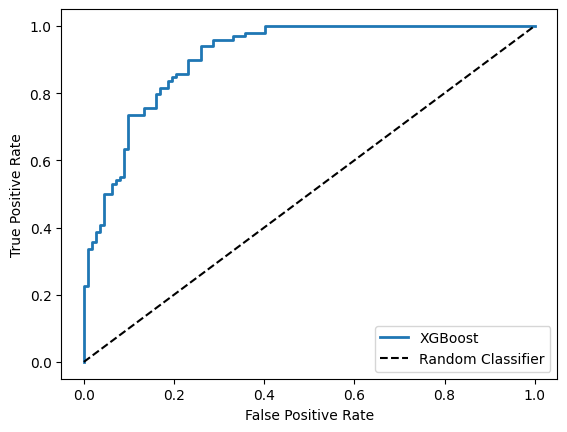

ROC AUC Score: 0.910441


In [35]:
# Plotting ROC curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, class_proba_test)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # dashed diagonal represents a pure random classifier 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_tree, tpr_tree, "XGBoost")
plt.legend(loc="lower right")
plt.show()

roc_auc = roc_auc_score(Y_test, class_proba_test)
print('ROC AUC Score: %f' % roc_auc)

## Implementing SVM

In [36]:
lsvc = LinearSVC(penalty = 'l2',C = 0.01,random_state=42,dual=True)
lsvc.fit(X_train,Y_train)
Y_pred_val = lsvc.predict(X_valid) 
Y_pred_train = lsvc.predict(X_train)
accuracy_tr = accuracy_score(Y_train,Y_pred_train)
accuracy_val = accuracy_score(Y_valid,Y_pred_val)
print(accuracy_tr,accuracy_val)

0.826530612244898 0.8428571428571429


In [37]:
param = [{'penalty':['l1','l2'],'C':[0.01,0.1,1],'loss':['squared_hinge'],'dual':[False],'random_state':[42]}]
lsvcg = LinearSVC()
grid_search = GridSearchCV(lsvcg,param,scoring = 'accuracy', return_train_score = True,cv = 3)
grid_search.fit(X_train,Y_train)

print('The best estimator is:\n',grid_search.best_estimator_,'\n')
print('The accuracy of the best estimator is',grid_search.best_score_,'\n')
print('The list of the parameters for the best estimator is:\n',grid_search.best_params_)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The best estimator is:
 LinearSVC(C=1, dual=False, penalty='l1', random_state=42) 

The accuracy of the best estimator is 0.8234773581483775 

The list of the parameters for the best estimator is:
 {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1', 'random_state': 42}


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
lsvc = LinearSVC(penalty = 'l2',C = 0.01,random_state=42,dual=True)
lsvc.fit(X_train,Y_train)
Y_predict_test = lsvc.predict(X_test) 
accuracy_test= accuracy_score(Y_test,Y_predict_test)

cc = CalibratedClassifierCV(estimator = lsvc, cv = 3)
cc.fit(X_train,Y_train)
class_proba = cc.predict_proba(X_test)
Y_scores_test_lsvc = class_proba[:,1]

cm = confusion_matrix(Y_test,Y_predict_test)
p = precision_score(Y_test,Y_predict_test)
r = recall_score(Y_test,Y_predict_test)
f1 = f1_score(Y_test,Y_predict_test)

print(' The accuracy,the precision,the recall and the f1 score are: %.2f, %.2f, %.2f, %.2f' %(accuracy_test,p,r,f1))

 The accuracy,the precision,the recall and the f1 score are: 0.80, 0.76, 0.82, 0.79


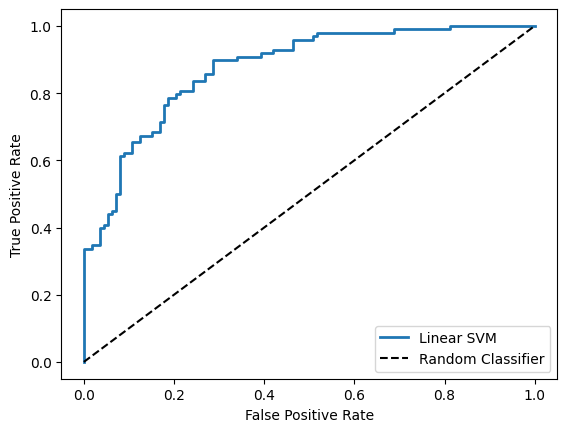

0.8756377551020408


In [39]:
fpr_lsvm,tpr_lsvm,thresholds_lsvm = roc_curve(Y_test,Y_scores_test_lsvc)

plot_roc_curve(fpr_lsvm, tpr_lsvm, "Linear SVM")
plt.legend(loc="lower right")
plt.show()

rc = roc_auc_score(Y_test,Y_scores_test_lsvc)
print(rc)

## Conclusions


### 1. Decision Tree
- **Accuracy on test set:** 0.761905
- **Precision:** 0.706897
- **Recall:** 0.836735
- **F1 Score:** 0.766355
- **ROC AUC Score:** 0.8238884839650146

**Analysis:**
- Decision Tree memiliki akurasi dan F1 Score yang lebih rendah dibandingkan model lain.
- Recall lebih tinggi daripada precision, menunjukkan bahwa model lebih cenderung mengklasifikasikan kelas positif secara benar, namun dengan risiko memberikan lebih banyak false positives.
- ROC AUC Score yang relatif lebih rendah menunjukkan performa keseluruhan yang kurang baik dalam memisahkan kelas.

---

### 2. Logistic Regression
- **Accuracy on train set:** 0.845918
- **Accuracy on validation set:** 0.814286
- **Accuracy on test set:** 0.819048
- **Precision:** 0.772727
- **Recall:** 0.867347
- **F1 Score:** 0.817308
- **ROC AUC Score:** 0.8989613702623906

**Analysis:**
- Logistic Regression menunjukkan akurasi yang konsisten antara train, validation, dan test set, menandakan model yang stabil dan tidak overfitting.
- Precision, recall, dan F1 Score menunjukkan keseimbangan yang baik antara prediksi positif yang benar dan yang salah.
- ROC AUC Score yang tinggi (0.899) menunjukkan kemampuan model dalam memisahkan kelas dengan sangat baik.

---

### 3. XGBoost
- **Accuracy on test set:** 0.819048
- **Precision:** 0.783019
- **Recall:** 0.846939
- **F1 Score:** 0.813725
- **ROC AUC Score:** 0.910441

**Analysis:**
- XGBoost memiliki akurasi yang sama dengan Logistic Regression pada test set, namun dengan precision dan recall yang sedikit lebih tinggi.
- F1 Score juga sangat baik, menunjukkan keseimbangan antara precision dan recall.
- ROC AUC Score tertinggi (0.910) menunjukkan bahwa XGBoost adalah model yang paling efektif dalam memisahkan kelas positif dan negatif.

---

### 4. Support Vector Machine (SVM)
- **Accuracy:** 0.80
- **Precision:** 0.76
- **Recall:** 0.82
- **F1 Score:** 0.79
- **ROC AUC Score:** 0.8756377551020408

**Analysis:**
- SVM memiliki akurasi, precision, dan F1 Score yang baik, tetapi lebih rendah dibandingkan dengan Logistic Regression dan XGBoost.
- ROC AUC Score lebih rendah dari Logistic Regression dan XGBoost, namun masih lebih tinggi daripada Decision Tree.

---

### Conclusion
- **XGBoost** memiliki performa terbaik di antara model yang diuji, dengan ROC AUC Score tertinggi (0.910) yang menandakan kemampuan terbaik dalam memisahkan kelas positif dan negatif, serta F1 Score yang seimbang.
- **Logistic Regression** juga menunjukkan performa yang sangat baik dan bisa menjadi alternatif yang lebih sederhana dan stabil, dengan ROC AUC Score yang hampir mendekati XGBoost.
- **SVM** memiliki performa yang baik tetapi tidak sebaik XGBoost dan Logistic Regression.
- **Decision Tree** menunjukkan performa terendah di antara semua model, baik dari segi akurasi, F1 Score, maupun ROC AUC Score.

Secara keseluruhan, **XGBoost** adalah model dengan performa terbaik berdasarkan metrik yang diberikan.
